# Cell Division 

## On a 2D mesh

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline

from tyssue.core.sheet import Sheet

from tyssue import config

from tyssue.geometry.planar_geometry import PlanarGeometry as geom
from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.dynamics.planar_vertex_model import PlanarModel as model

from tyssue.draw.plt_draw import sheet_view
from tyssue.stores import load_datasets

from tyssue.topology.sheet_topology import remove_face, cell_division
from tyssue.core.objects import get_opposite

/home/guillaume/miniconda3/envs/tyssue/lib/python3.6/site-packages/tyssue-0.2rc1-py3.6.egg/tyssue/core/generation.py:3: UserWarning: generation should not be imported from core anymore but from its own module
  warnings.warn('generation should not be imported from core anymore but from its own module')


Reseting datasets values with new specs


Number of cells: 20
          edges: 116
          vertices: 54



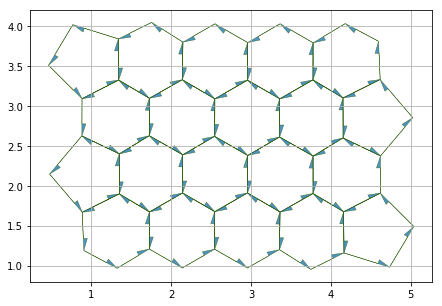

In [2]:
sheet = Sheet.planar_sheet_2d('division', 6, 6, 1, 1)
sheet.sanitize()
geom.update_all(sheet)

sheet.edge_df['opposite'] = get_opposite(sheet.edge_df)

# ## Set up the model
nondim_specs = config.dynamics.quasistatic_plane_spec()
dim_model_specs = model.dimentionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)

print("Number of cells: {}\n"
      "          edges: {}\n"
      "          vertices: {}\n".format(sheet.Nf, sheet.Ne, sheet.Nv))

# ## Minimize energy
res = solver.find_energy_min(sheet, geom, model)

# ## View the result
draw_specs = config.draw.sheet_spec()
draw_specs['vert']['visible'] = False
draw_specs['edge']['head_width'] = 0.1
fig, ax = sheet_view(sheet, **draw_specs)
fig.set_size_inches(12, 5)

True


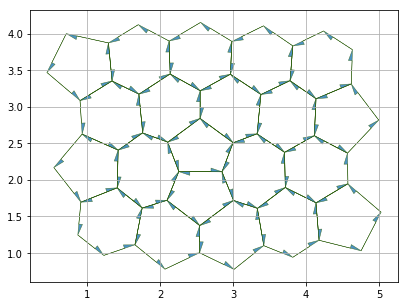

In [3]:
daughter = cell_division(sheet, 7, geom, angle=np.pi/2)

res = solver.find_energy_min(sheet, geom, model)
print(res['success'])

fig, ax = sheet_view(sheet, **draw_specs)
fig.set_size_inches(12, 5)

## Division in a 3D single layer epithelium

In [4]:
from tyssue.io.hdf5 import save_datasets, load_datasets
# redefine cell_division from monolayer related topology module
from tyssue.topology.monolayer_topology import cell_division

from tyssue import Monolayer, MonoLayerGeometry
from tyssue.geometry.bulk_geometry import BulkGeometry
from tyssue.dynamics.bulk_model import BulkModel, set_model
from tyssue.draw.ipv_draw import view_ipv


In [22]:
datasets = load_datasets('../examples/small_ellipsoid.hf5',
                         data_names=['vert', 'edge',
                                     'face', 'cell'])
specs = config.geometry.bulk_spec()

monolayer = Monolayer('ell', datasets, specs)

# ## Settings for the quasi-static model
# ### Apical layer
apical_spec = {
    'edge': {
        'line_tension': 0.12,},
    'face': {
        'contractility': 0.04,
        'prefered_area': 0.8,
        'area_elasticity': 1.0},
    'cell': {
        'prefered_vol': 1.0,
        'vol_elasticity': 1.0},
    'settings': {
        'grad_norm_factor': 1.0,
        'nrj_norm_factor': 1.0},}

# ### Modifier for each segment of the stratum
modifiers = {
    'sagittal': {
        'edge': {
            'line_tension': 0.1},
        'face': {
            'contractility': 0.05,
            'prefered_area': 0.2}
    },
    'basal': {
        'edge': {
            'line_tension': 0.5},
        'face': {
            'contractility': 0.1,
            'prefered_area': 0.2}},
    }

set_model(monolayer, BulkModel, apical_spec, modifiers)


Reseting datasets values with new specs


mother = 8
daughter = cell_division(monolayer, mother, 
                         orientation='vertical')

In [23]:
import ipyvolume as ipv
rho = np.linalg.norm(monolayer.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer.vert_df.index)
ipv.clear()
colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'
fig, mesh = view_ipv(monolayer, **draw_specs['edge'])


VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[ 0.477504,  0.821444,  0.318195],
       [ 0.412913,  0.803041,  0.357269],
       [ 0.626579,  0.854645,  0.223353],
       [ 0.214   ,  0.722114,  0.469588],
       [ 0.175707,  0.6979  ,  0.491033],
       [ 0.239374,  0.735588,  0.455688],
       [ 0.458674,  0.816363,  0.329727],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.157851,  0.683765,  0.501686],
       [ 0.377779,  0.791781,  0.377939],
       [ 0.496615,  0.826376,  0.306377],
       [ 0.360741,  0.785964,  0.387814],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.545524,  0.838039,  0.275626],
       [ 0.555484,  0.840254,  0.269281],
       [ 0.162016,  0.687316,  0.499129],
       [ 0.175707,  0.6979  ,  0.491033],
       [ 0.344074,  0.780029,  0.397381],
       [ 0.153894,  0.680203,  0.504172],
       [ 0.496615,  0.826376,  0.306377],
       [ 0.377779,  0.791781,  0.377939],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.430983,  0.808473,  0.346476],
       [ 0.14021 ,  0.665859,  0.513427],
       [ 0.170948,  0.694384,  0.493803],
       [ 0.335885,  0.777018,  0.402049],
       [ 0.146616,  0.67305 ,  0.508936],
       [ 0.535621,  0.835785,  0.281908],
       [ 0.386433,  0.794644,  0.372886],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.545524,  0.838039,  0.275626],
       [ 0.143303,  0.669459,  0.511215],
       [ 0.202219,  0.715272,  0.476084],
       [ 0.421908,  0.805774,  0.35191 ],
       [ 0.146616,  0.67305 ,  0.508936],
       [ 0.535621,  0.835785,  0.281908],
       [ 0.369214,  0.788888,  0.382914],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.626579,  0.854645,  0.223353],
       [ 0.157851,  0.683765,  0.501686],
       [ 0.214   ,  0.722114,  0.469588],
       [ 0.440137,  0.811138,  0.340967],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.487026,  0.823929,  0.312321],
       [ 0.344074,  0.780029,  0.397381],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.575563,  0.844566,  0.256415],
       [ 0.153894,  0.680203,  0.504172],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.360741,  0.785964,  0.387814],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.487026,  0.823929,  0.312321],
       [ 0.377779,  0.791781,  0.377939],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.440137,  0.811138,  0.340967],
       [ 0.14021 ,  0.665859,  0.513427],
       [ 0.157851,  0.683765,  0.501686],
       [ 0.319809,  0.770914,  0.411152],
       [ 0.146616,  0.67305 ,  0.508936],
       [ 0.535621,  0.835785,  0.281908],
       [ 0.395174,  0.797475,  0.367757],
       [ 0.196571,  0.711827,  0.479221],
       [ 0.82494 ,  0.88472 ,  0.106217],
       [ 0.741388,  0.873449,  0.149561],
       [ 0.804182,  0.882046,  0.114965],
       [ 0.730889,  0.871916,  0.156029],
       [ 0.720391,  0.87035 ,  0.162603],
       [ 0.783315,  0.879285,  0.125405],
       [ 0.845561,  0.887322,  0.099702],
       [ 0.783315,  0.879285,  0.125405],
       [ 0.916242,  0.896091,  0.100717],
       [ 0.730889,  0.871916,  0.156029],
       [ 0.83527 ,  0.886029,  0.102646],
       [ 0.730889,  0.871916,  0.156029],
       [ 0.720391,  0.87035 ,  0.162603],
       [ 0.79376 ,  0.880678,  0.120005],
       [ 0.741388,  0.873449,  0.149561],
       [ 0.79376 ,  0.880678,  0.120005],
       [ 0.886271,  0.892374,  0.095374],
       [ 0.845561,  0.887322,  0.099702],
       [ 0.866013,  0.889868,  0.095953],
       [ 0.85581 ,  0.888601,  0.097452],
       [ 0.85581 ,  0.888601,  0.097452],
       [ 0.945636,  0.899815,  0.112838],
       [ 0.993248,  0.906157,  0.143936],
       [ 0.993248,  0.906157,  0.143936],
       [ 0.79376 ,  0.880

In [24]:

mother = 8
eptm = monolayer#bad
invalid_edges = eptm.get_invalid()

eptm.edge_df['is_valid'] = ~invalid_edges

bad_edges = eptm.edge_df[~eptm.edge_df['is_valid']].index
bad_cells = eptm.edge_df.loc[bad_edges, 'cell'].unique()


In [25]:
bad_cells

array([], dtype=int64)

In [26]:
from tyssue.geometry.utils import rotation_matrix
from tyssue.topology.base_topology import add_vert, close_face


def get_division_edges(eptm, mother,
                       plane_normal,
                       plane_center=None):
    """
    """
    plane_normal = np.asarray(plane_normal)
    if plane_center is None:
        plane_center = eptm.cell_df.loc[mother, eptm.coords]

    n_xy = np.linalg.norm(plane_normal[:2])
    theta = -np.arctan2(n_xy, plane_normal[2])
    direction = [plane_normal[1], -plane_normal[0], 0]
    rot = rotation_matrix(theta, direction)
    cell_verts = set(eptm.edge_df[eptm.edge_df['cell'] == mother]['srce'])
    vert_pos = eptm.vert_df.loc[cell_verts, eptm.coords]
    for c in eptm.coords:
        vert_pos[c] -= plane_center[c]
    vert_pos[:] = np.dot(vert_pos, rot)
    
    mother_edges = eptm.edge_df[eptm.edge_df['cell'] == mother]
    srce_z = vert_pos.loc[mother_edges['srce'], 'z']
    srce_z.index = mother_edges.index
    trgt_z = vert_pos.loc[mother_edges['trgt'], 'z']
    trgt_z.index = mother_edges.index
    division_edges = mother_edges[((srce_z < 0) &
                                   (trgt_z >= 0))]
    # Order the returned edges so that their centers
    # are oriented counterclockwize in the division plane
    # in preparation for septum creation
    srce_pos = vert_pos.loc[division_edges['srce'],
                            eptm.coords].values
    trgt_pos = vert_pos.loc[division_edges['trgt'],
                            eptm.coords].values
    centers = (srce_pos + trgt_pos)/2
    theta = np.arctan2(centers[:, 2], centers[:, 1])
    return division_edges.index[np.argsort(theta)]



def get_division_vertices(eptm,
                          division_edges=None,
                          mother=None,
                          plane_normal=None,
                          plane_center=None):

    if division_edges is None:
        division_edges = get_division_edges(eptm, mother,
                                            plane_normal,
                                            plane_center)
    vertices = []
    for edge in division_edges:
        new_vert, *new_edges = add_vert(eptm, edge)
        vertices.append(new_vert)
    return vertices


In [27]:
mother = 10
ab_axis = MonoLayerGeometry.basal_apical_axis(monolayer, mother)
plane_normal = np.asarray(ab_axis)

edges = get_division_edges(monolayer, mother, plane_normal)

#h_vertices = get_division_vertices(monolayer,
#                                   mother=mother,
#                                   plane_normal=plane_normal)


In [28]:
edges

Int64Index([793, 781, 1613, 777, 785, 789], dtype='int64', name='edge')

In [29]:
verts = get_division_vertices(eptm, division_edges=edges)

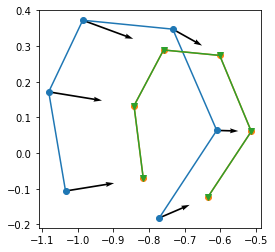

In [30]:
MonoLayerGeometry.update_all(eptm)

fig, ax = plt.subplots()

ax.quiver(
    eptm.vert_df.loc[
        eptm.edge_df.loc[edges, 'srce'], 'z'].values,
    eptm.vert_df.loc[
        eptm.edge_df.loc[edges, 'srce'], 'x'].values,
    eptm.edge_df.loc[edges, 'dz'].values,
    eptm.edge_df.loc[edges, 'dx'].values,
    scale=1.)

ax.plot(
    eptm.vert_df.loc[eptm.edge_df.loc[edges, 'srce'], 'z'].values,
    eptm.vert_df.loc[eptm.edge_df.loc[edges, 'srce'], 'x'].values, '-o')

ax.plot(
    eptm.vert_df.loc[eptm.edge_df.loc[edges, 'trgt'], 'z'].values,
    eptm.vert_df.loc[eptm.edge_df.loc[edges, 'trgt'], 'x'].values, '-o')
ax.set_aspect('equal')

ax.plot(
    eptm.vert_df.loc[verts, 'z'].values,
    eptm.vert_df.loc[verts, 'x'].values, '-v')




In [31]:
verts

[184, 185, 186, 187, 188, 189]

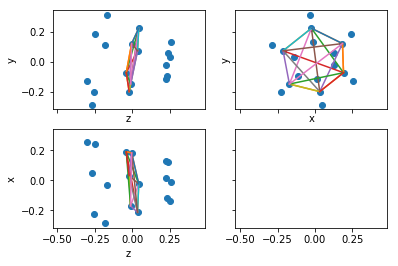

In [32]:
plane_normal = ab_axis
plane_center = eptm.cell_df.loc[mother, eptm.coords]
n_xy = np.linalg.norm(plane_normal[:2])
theta = -np.arctan2(n_xy, plane_normal[2])
direction = [plane_normal[1], -plane_normal[0], 0]
rot = rotation_matrix(theta, direction)
cell_verts = set(eptm.edge_df[eptm.edge_df['cell'] == mother]['srce'])
vert_pos = eptm.vert_df.loc[cell_verts, eptm.coords]
for c in eptm.coords:
    vert_pos[c] -= plane_center[c]
vert_pos[:] = np.dot(vert_pos, rot)

fig, [[ax_zy, ax_xy],
      [ax_zx, _]] = plt.subplots(2, 2, 
                               sharex=True,
                               sharey=True)
for ax, (u, v) in zip([ax_zx, ax_zy, ax_xy],
                       ['zx', 'zy', 'xy']):

    ax.plot(vert_pos[u], vert_pos[v], 'o')
    ax.set(aspect='equal', xlabel=u, ylabel=v)
    ax.plot(vert_pos.loc[verts, u], vert_pos.loc[verts, v], '-')
    

import itertools
pairs = set([frozenset([v1, v2]) for v1, v2
             in itertools.product(verts,
                                  verts) if v1 != v2])

for v1, v2 in pairs:
    for ax, (u, v) in zip([ax_zx, ax_zy, ax_xy],
                           ['zx', 'zy', 'xy']):

        ax.plot(vert_pos.loc[[v1, v2], u],
                vert_pos.loc[[v1, v2], v], '-')
    


In [33]:
import itertools
pairs = set([frozenset([v1, v2]) for v1, v2
             in itertools.product(verts,
                                  verts) if v1 != v2])

faces_to_divide = []

# devide existing faces
for v1, v2 in pairs:
    v1_faces = eptm.edge_df[eptm.edge_df['srce'] == v1]['face']
    v2_faces = eptm.edge_df[eptm.edge_df['srce'] == v2]['face']
    # we should devide a face if both v1 and v2
    # are part of it
    faces = set(v1_faces).intersection(v2_faces)
    if len(faces):
        faces_to_divide.append(faces)

In [35]:
faces_to_divide

[{153, 322}, {155, 159}, {132, 154}, {128, 152}, {360, 361}, {156, 180}]

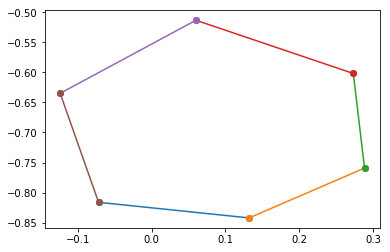

In [34]:
fig, ax = plt.subplots()
for v1, v2, in zip(verts,np.roll(verts, -1)):
    ax.plot( eptm.vert_df.loc[[v1, v2], 'x'],
             eptm.vert_df.loc[[v1, v2], 'z'], '-o')

In [36]:
from tyssue.topology.sheet_topology import face_division


In [41]:
def cell_division(eptm, mother, geom, vertices):

    cell_cols = eptm.cell_df.loc[mother]
    eptm.cell_df = eptm.cell_df.append(cell_cols,
                                       ignore_index=True)
    eptm.cell_df.index.name = 'cell'
    daughter = eptm.cell_df.index[-1]

    pairs = set([frozenset([v1, v2]) for v1, v2
                 in itertools.product(vertices,
                                      vertices) if v1 != v2])
    to_divide = []
    # devide existing faces
    for v1, v2 in pairs:
        v1_faces = eptm.edge_df[eptm.edge_df['srce'] == v1]['face']
        v2_faces = eptm.edge_df[eptm.edge_df['srce'] == v2]['face']
        # we should devide a face if both v1 and v2
        # are part of it
        faces = set(v1_faces).intersection(v2_faces)
        if len(faces) == 2:
            f0, f1 = faces
            faces_to_divide.append((f0, v1, v2))
            faces_to_divide.append((f1, v1, v2))
        elif len(faces) not in (0, 2):
            raise ValueError('Incorrect number of common faces'
                             ' between two vertex')
            
            
    daughter_faces = []
    for face, v1, v2 in set(to_divide):
        daughter_faces.append(
            face_division(eptm, face, v1, v2))

    #septum
    face_cols = eptm.face_df.iloc[-2:]
    eptm.face_df = eptm.face_df.append(face_cols, ignore_index=True)
    eptm.face_df.index.name = 'face'
    septum = eptm.face_df.index[-2:]
    daughter_faces.extend(list(septum))

    num_v = len(vertices)
    num_new_edges = num_v*2

    edge_cols = eptm.edge_df.iloc[-num_new_edges:]
    eptm.edge_df = eptm.edge_df.append(edge_cols,
                                       ignore_index=True)
    eptm.edge_df.index.name = 'edge'
    new_edges = eptm.edge_df.index[-num_new_edges:]

    # To keep mother orientation, the first septum face
    # belongs to mother
    for v1, v2, edge, oppo in zip(vertices,
                                  np.roll(vertices, -1),
                                  new_edges[:num_v],
                                  new_edges[num_v:]):
        # Mother septum
        eptm.edge_df.loc[edge,
                         ['srce', 'trgt',
                          'face', 'cell']] = (v1, v2,
                                              septum[0], mother)
        # Daughter septum
        eptm.edge_df.loc[oppo,
                         ['srce', 'trgt',
                          'face', 'cell']] = (v2, v1,
                                              septum[1], daughter)

    eptm.reset_index()
    eptm.reset_topo()
    geom.update_all(eptm)

    m_septum_edges = eptm.edge_df[eptm.edge_df['face'] == septum[0]]
    m_septum_norm = m_septum_edges[eptm.ncoords].mean()
    m_septum_pos = eptm.face_df.loc[septum[0], eptm.coords]

    # splitting the faces between mother and daughter
    # based on the orientation of the vector from septum
    # center to each face center w/r to the septum norm
    mother_faces = set(eptm.edge_df[eptm.edge_df['cell'] == mother]['face'])
    for face in mother_faces:
        if face == septum[0]:
            continue
        dr = eptm.face_df.loc[face, eptm.coords] - m_septum_pos
        proj = (dr.values * m_septum_norm).sum(axis=0)
        f_edges = eptm.edge_df[eptm.edge_df['face'] == face].index
        if proj < 0:
            eptm.edge_df.loc[f_edges, 'cell'] = mother
        else:
            eptm.edge_df.loc[f_edges, 'cell'] = daughter
    eptm.reset_index()
    eptm.reset_topo()
    return daughter


In [39]:
%pdb

Automatic pdb calling has been turned ON


In [42]:
cell_division(eptm, mother, BulkGeometry, verts)

49

In [51]:
print(mother)

10


In [43]:
rho = np.linalg.norm(monolayer.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer.vert_df.index)
ipv.clear()
colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'
fig, mesh = view_ipv(monolayer, **draw_specs['edge'])

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[ 0.477504,  0.821444,  0.318195],
       [ 0.412913,  0.803041,  0.357269],
       [ 0.626579,  0.854645,  0.223353],
       [ 0.214   ,  0.722114,  0.469588],
       [ 0.175707,  0.6979  ,  0.491033],
       [ 0.239374,  0.735588,  0.455688],
       [ 0.458674,  0.816363,  0.329727],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.157851,  0.683765,  0.501686],
       [ 0.377779,  0.791781,  0.377939],
       [ 0.496615,  0.826376,  0.306377],
       [ 0.360741,  0.785964,  0.387814],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.545524,  0.838039,  0.275626],
       [ 0.555484,  0.840254,  0.269281],
       [ 0.162016,  0.687316,  0.499129],
       [ 0.175707,  0.6979  ,  0.491033],
       [ 0.344074,  0.780029,  0.397381],
       [ 0.153894,  0.680203,  0.504172],
       [ 0.496615,  0.826376,  0.306377],
       [ 0.377779,  0.791781,  0.377939],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.430983,  0.808473,  0.346476],
       [ 0.14021 ,  0.665859,  0.513427],
       [ 0.170948,  0.694384,  0.493803],
       [ 0.335885,  0.777018,  0.402049],
       [ 0.146616,  0.67305 ,  0.508936],
       [ 0.535621,  0.835785,  0.281908],
       [ 0.386433,  0.794644,  0.372886],
       [ 0.19109 ,  0.708366,  0.482284],
       [ 0.545524,  0.838039,  0.275626],
       [ 0.143303,  0.669459,  0.511215],
       [ 0.202219,  0.715272,  0.476084],
       [ 0.421908,  0.805774,  0.35191 ],
       [ 0.146616,  0.67305 ,  0.508936],
       [ 0.535621,  0.835785,  0.281908],
       [ 0.369214,  0.788888,  0.382914],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.626579,  0.854645,  0.223353],
       [ 0.157851,  0.683765,  0.501686],
       [ 0.214   ,  0.722114,  0.469588],
       [ 0.440137,  0.811138,  0.340967],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.487026,  0.823929,  0.312321],
       [ 0.344074,  0.780029,  0.397381],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.575563,  0.844566,  0.256415],
       [ 0.153894,  0.680203,  0.504172],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.360741,  0.785964,  0.387814],
       [ 0.150148,  0.676631,  0.506589],
       [ 0.487026,  0.823929,  0.312321],
       [ 0.377779,  0.791781,  0.377939],
       [ 0.185783,  0.704891,  0.485273],
       [ 0.440137,  0.811138,  0.340967],
       [ 0.14021 ,  0.665859,  0.513427],
       [ 0.157851,  0.683765,  0.501686],
       [ 0.319809,  0.770914,  0.411152],
       [ 0.146616,  0.67305 ,  0.508936],
       [ 0.535621,  0.835785,  0.281908],
       [ 0.395174,  0.797475,  0.367757],
       [ 0.196571,  0.711827,  0.479221],
       [ 0.82494 ,  0.88472 ,  0.106217],
       [ 0.741388,  0.873449,  0.149561],
       [ 0.804182,  0.882046,  0.114965],
       [ 0.730889,  0.871916,  0.156029],
       [ 0.720391,  0.87035 ,  0.162603],
       [ 0.783315,  0.879285,  0.125405],
       [ 0.845561,  0.887322,  0.099702],
       [ 0.783315,  0.879285,  0.125405],
       [ 0.916242,  0.896091,  0.100717],
       [ 0.730889,  0.871916,  0.156029],
       [ 0.83527 ,  0.886029,  0.102646],
       [ 0.730889,  0.871916,  0.156029],
       [ 0.720391,  0.87035 ,  0.162603],
       [ 0.79376 ,  0.880678,  0.120005],
       [ 0.741388,  0.873449,  0.149561],
       [ 0.79376 ,  0.880678,  0.120005],
       [ 0.886271,  0.892374,  0.095374],
       [ 0.845561,  0.887322,  0.099702],
       [ 0.866013,  0.889868,  0.095953],
       [ 0.85581 ,  0.888601,  0.097452],
       [ 0.85581 ,  0.888601,  0.097452],
       [ 0.945636,  0.899815,  0.112838],
       [ 0.993248,  0.906157,  0.143936],
       [ 0.993248,  0.906157,  0.143936],
       [ 0.79376 ,  0.880

In [44]:
invalid_edges = eptm.get_invalid()
np.alltrue(~invalid_edges.values)

In [52]:
eptm.Nf

374

In [54]:
inv_faces = eptm.edge_df[invalid_edges]['face'].unique()
inv_cells = eptm.edge_df[invalid_edges]['cell'].unique()


In [56]:
inv_faces

array([ 10,  58, 152, 153, 154, 155, 156, 361, 372, 373])

In [58]:
from tyssue.core import objects

In [61]:
for face in inv_faces:
    print(objects._test_invalid(
            eptm.edge_df[eptm.edge_df['face']==face]))

False
False
False
False
False
False
False
False
False
False


In [62]:
is_closed = eptm.validate_closed_cells()

In [70]:
edges_c10 = eptm.edge_df[eptm.edge_df['cell'] == 10]
edges_c49 = eptm.edge_df[eptm.edge_df['cell'] == 49]


In [73]:
set(edges_c10['srce']).difference(edges_c10['trgt'])

set()

In [77]:
edges = edges_c10[['srce', 'trgt']]

for e, (srce, trgt) in edges.iterrows():
    if (edges[(edges['srce'] == trgt) &
              (edges['trgt'] == srce)].index.size != 1):
        print(edges[(edges['srce'] == trgt) &
              (edges['trgt'] == srce)].index)
        print('bad: ', srce, trgt)


Int64Index([], dtype='int64', name='edge')
bad:  88 68
Int64Index([], dtype='int64', name='edge')
bad:  19 16
Int64Index([], dtype='int64', name='edge')
bad:  24 19
Int64Index([], dtype='int64', name='edge')
bad:  66 88
Int64Index([], dtype='int64', name='edge')
bad:  16 187
Int64Index([], dtype='int64', name='edge')
bad:  108 158
Int64Index([], dtype='int64', name='edge')
bad:  186 66
Int64Index([], dtype='int64', name='edge')
bad:  68 184
Int64Index([], dtype='int64', name='edge')
bad:  160 116
Int64Index([], dtype='int64', name='edge')
bad:  189 24
Int64Index([], dtype='int64', name='edge')
bad:  184 160
Int64Index([], dtype='int64', name='edge')
bad:  158 186
Int64Index([], dtype='int64', name='edge')
bad:  187 108
Int64Index([], dtype='int64', name='edge')
bad:  116 189
Int64Index([], dtype='int64', name='edge')
bad:  184 185
Int64Index([], dtype='int64', name='edge')
bad:  185 186
Int64Index([], dtype='int64', name='edge')
bad:  186 187
Int64Index([], dtype='int64', name='edge')


In [67]:
eptm.cell_df[~is_closed.values]

ValueError: Item wrong length 49 instead of 50.

> /home/guillaume/miniconda3/envs/tyssue/lib/python3.6/site-packages/pandas/core/frame.py(1995)_getitem_array()
   1993             elif len(key) != len(self.index):
   1994                 raise ValueError('Item wrong length %d instead of %d.' %
-> 1995                                  (len(key), len(self.index)))
   1996             # check_bool_indexer will throw exception if Series key cannot
   1997             # be reindexed to match DataFrame rows

ipdb> c


In [116]:

rho = np.linalg.norm(monolayer.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer.vert_df.index)

colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'

canvas, view = vp_view(monolayer, coords=['z', 'x', 'y'], **draw_specs)

fig, ax = plt.subplots()
ax.imshow(canvas.render())
fig.set_size_inches(12, 12)


NameError: name 'vp_view' is not defined

In [27]:
res = solver.find_energy_min(monolayer, BulkGeometry, BulkModel)

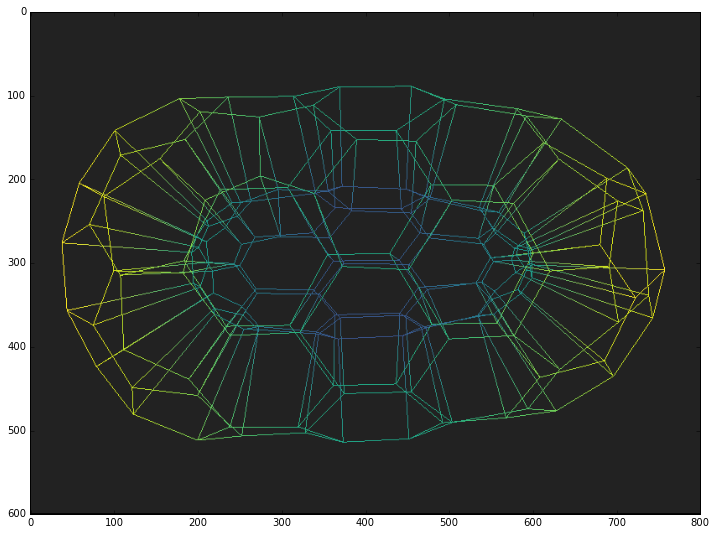

In [28]:
rho = np.linalg.norm(monolayer.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer.vert_df.index)

colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'

canvas, view = vp_view(monolayer, coords=['z', 'x', 'y'], **draw_specs)

fig, ax = plt.subplots()
ax.imshow(canvas.render())
fig.set_size_inches(12, 12)